# Simple EDA of Crypto Data

This notebook connects to the DuckDB database and performs a basic exploratory analysis.

In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
con = duckdb.connect('../data/crypto.duckdb')

## Fundings Analysis

In [2]:
# Load fundings table
df_fund = con.execute("SELECT * FROM fundings").fetchdf()
print(f"Total funding records: {len(df_fund)}")
df_fund.head()

Total funding records: 7958


,ticker,exchange,datetime,funding_rate,timestamp
0,AEVO/USDT,binance_futures,2025-12-05 12:00:00.001,0.000050,1764936000001
1,AEVO/USDT,binance_futures,2025-12-05 16:00:00.010,0.000029,1764950400010
2,AEVO/USDT,binance_futures,2025-12-05 20:00:00.001,0.000050,1764964800001
3,AEVO/USDT,binance_futures,2025-12-06 00:00:00.001,-0.000083,1764979200001
4,AEVO/USDT,binance_futures,2025-12-06 04:00:00.000,0.000050,1764993600000


In [3]:
print("Unique counts per column:")
print(df_fund.nunique())

print("\nRecords per exchange:")
print(df_fund['exchange'].value_counts())

Unique counts per column:
ticker            17
exchange           2
datetime         897
funding_rate    3589
timestamp        897
dtype: int64

Records per exchange:
exchange
hyperliquid        6788
binance_futures    1170
Name: count, dtype: int64


In [ ]:
df_fund['datetime'].sort_values()

0      2025-12-05 12:00:00.001
900    2025-12-05 12:00:00.001
720    2025-12-05 12:00:00.001
540    2025-12-05 12:00:00.001
360    2025-12-05 12:00:00.001
                 ...          
6517   2026-01-04 11:00:00.051
3329   2026-01-04 11:00:00.051
2609   2026-01-04 11:00:00.051
4769   2026-01-04 11:00:00.051
7957   2026-01-04 11:00:00.051
Name: datetime, Length: 7958, dtype: datetime64[us]

: 

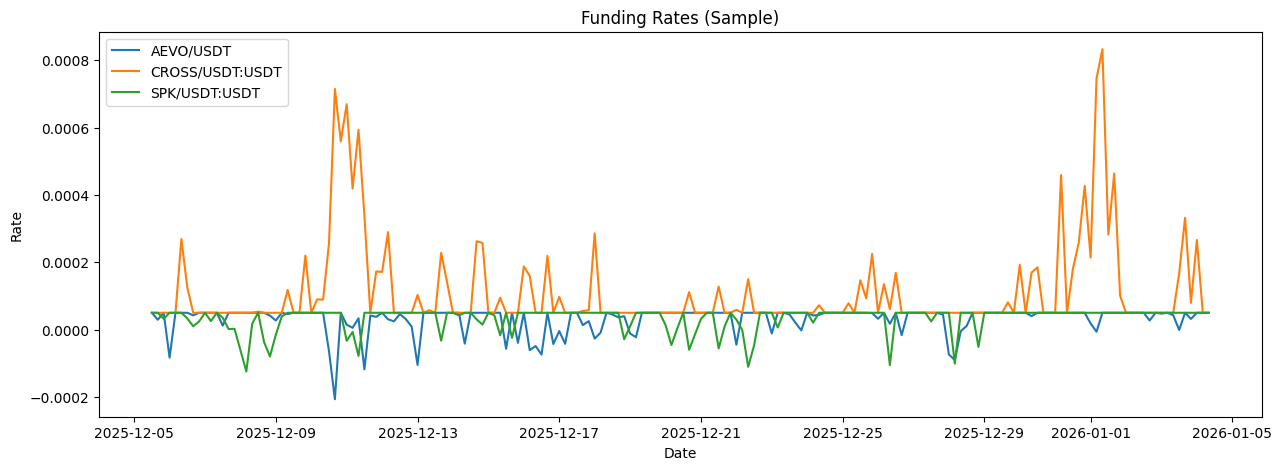

In [4]:
# Plot funding rates for a few random tickers
tickers = df_fund['ticker'].unique()[:3]

plt.figure(figsize=(15, 5))
for ticker in tickers:
    subset = df_fund[df_fund['ticker'] == ticker].sort_values('datetime')
    plt.plot(subset['datetime'], subset['funding_rate'], label=ticker)

plt.title('Funding Rates (Sample)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

## Prices (OHLCV) Analysis

In [5]:
# Load ohlcv table
df_ohlcv = con.execute("SELECT * FROM ohlcv").fetchdf()
print(f"Total OHLCV records: {len(df_ohlcv)}")
df_ohlcv.head()

Total OHLCV records: 11829


,ticker,exchange,datetime,open,high,low,close,volume,timestamp
0,AEVO/USDT,binance_futures,2025-12-05 12:00:00,0.04366,0.04385,0.04352,0.04370,1479847.3,1764936000000
1,AEVO/USDT,binance_futures,2025-12-05 13:00:00,0.04369,0.04390,0.04305,0.04321,2427755.9,1764939600000
2,AEVO/USDT,binance_futures,2025-12-05 14:00:00,0.04322,0.04350,0.04285,0.04304,3216575.7,1764943200000
3,AEVO/USDT,binance_futures,2025-12-05 15:00:00,0.04306,0.04428,0.04306,0.04362,5357165.2,1764946800000
4,AEVO/USDT,binance_futures,2025-12-05 16:00:00,0.04361,0.04364,0.04143,0.04186,9993281.4,1764950400000


In [6]:
print("Unique counts per column:")
print(df_ohlcv.nunique())

print("\nRecords per exchange:")
print(df_ohlcv['exchange'].value_counts())

Unique counts per column:
ticker          17
exchange         2
datetime       720
open          8536
high          8576
low           8535
close         8582
volume       11773
timestamp      720
dtype: int64

Records per exchange:
exchange
hyperliquid        6789
binance_futures    5040
Name: count, dtype: int64


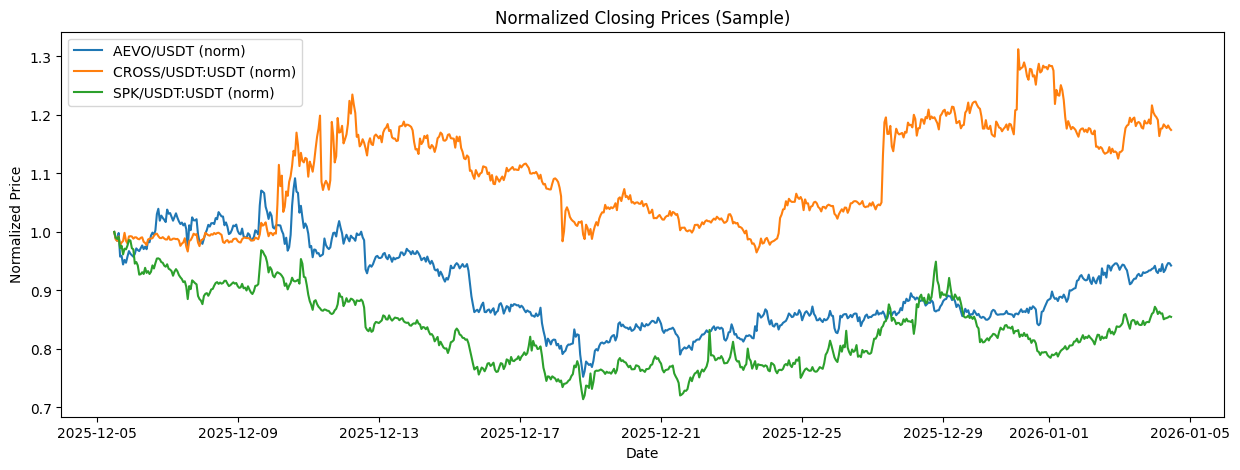

In [7]:
# Plot closing prices for a few random tickers
tickers = df_ohlcv['ticker'].unique()[:3]

plt.figure(figsize=(15, 5))
for ticker in tickers:
    subset = df_ohlcv[df_ohlcv['ticker'] == ticker].sort_values('datetime')
    # Normalize price to compare trends
    normalized_price = subset['close'] / subset['close'].iloc[0]
    plt.plot(subset['datetime'], normalized_price, label=f"{ticker} (norm)")

plt.title('Normalized Closing Prices (Sample)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()